In [1]:
%matplotlib inline
import sys
sys.path.append('./opmap/opmap/')

In [2]:
from RawCam import RawCam
from VmemMap import VmemMap
from PhaseMap import PhaseMap
from PhaseVarianceMap import PhaseVarianceMap

## Parameters

In [3]:
path = "/mnt/recordings/ExperimentData/20161019-2/C001H001S0012/"
cam_type = "sa4"
image_width = 512
image_height = 512
frame_start = 0 
frame_end = 500 # end frame (-1:all)

In [4]:
showFrame = 230

## RawCam

In [5]:
cam = RawCam(
    path,cam_type,
    image_width, image_height,
    frame_start, frame_end
)

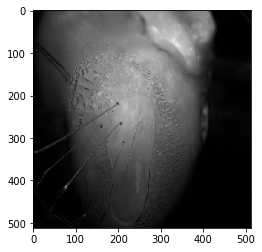

In [6]:
cam.showFrame(showFrame)

## VmemMap

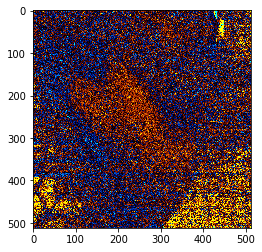

In [7]:
vmem = VmemMap(cam)
vmem.showFrame(showFrame)

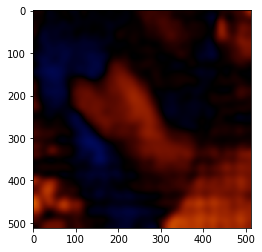

In [8]:
vmem.smooth(9)
vmem.showFrame(showFrame)

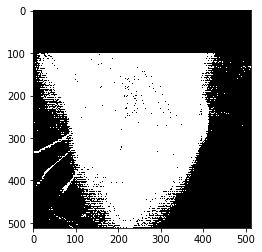

In [9]:
vmem.setDiffRange(diff_min=60, diff_max=200)
vmem.setRectROI(top=100)
vmem.showROI()

## PhaseMap

./opmap/opmap/VideoData.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data = np.zeros((length, height, width), dtype=np.float32)
/root/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
./opmap/opmap/PhaseMap.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = scipy.signal.lfilter(b, 1, y)[numtaps/2:]
./opmap/opmap/PhaseMap.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y_ = np.r_[y, np.zeros(numtaps/2)]


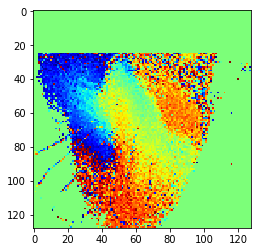

In [10]:
pmap = PhaseMap(vmem, shrink=4)
pmap.showFrame(showFrame)

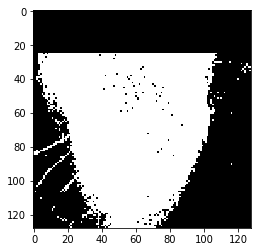

In [11]:
pmap.showROI()

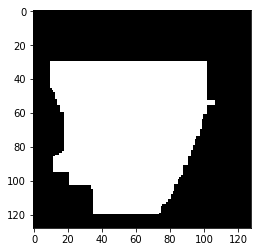

In [12]:
pmap.morphROI(closing=10)
pmap.morphROI(erosion=10)
pmap.setRectROI(top=10)
pmap.showROI()

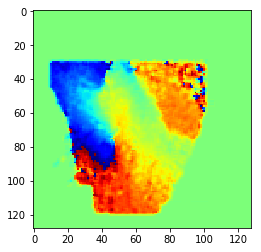

In [13]:
pmap.smooth(size=3)
pmap.showFrame(showFrame)

## PhaseVarianceMap

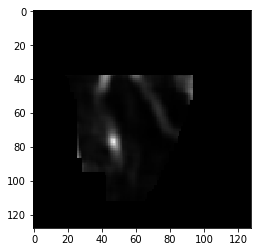

In [14]:
pvmap = PhaseVarianceMap(pmap, size=9)
pvmap.morphROI(erosion=9)
pvmap.showFrame(showFrame)